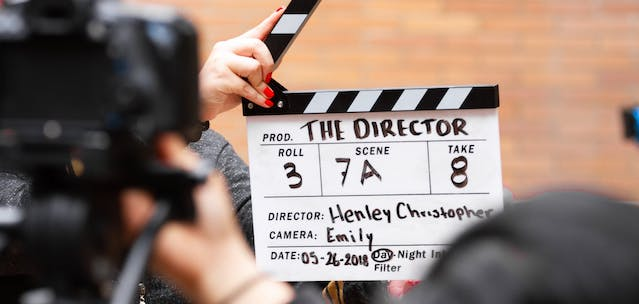

##Uncovering Film Trends Through Exploratory Data Analysis

* Student name: Rosalia Wanini
* Student pace: Part time Online Student
* Scheduled project review date: August 3rd 2025
* Instructor name: Noah Kandie

##Overview
With major tech and media companies producing original video content, Microsoft is launching a movie studio to enter the entertainment space. However, with limited in-house expertise in filmmaking, strategic guidance is required to identify profitable genres and production strategies. The goal is to provide actionable insights, after conducting an exploratory data analysis of the data provided, that will inform the studio's initial content strategy and film development roadmap

##Business Problem
**What type of films to create?**

As I prepare to begin reviewing and understanding the data, I put together a preliminary list of questions that could help answer the ultimate question above.

* What genres are currently doing the best at the box office?
* What genres to make?
* What are the most rated movie genres?
* How much does it cost to make each genre of movie?

These questions were prioritized because they allow both exploratory and diagnostic analysis: identifying high-performing genres and understanding the drivers behind them.

##Data Understanding
To conduct a comprehensive evaluation of film performance, I used 5 datasets compiled from industry-leading platforms:

* Box Office Mojo
* IMDB
* Rotten Tomatoes
* TheMovieDB
* The Numbers

These sources directly address the core analysis questions:

* Genre popularity → from IMDB and TheMovieDB
* Box office success → from Box Office Mojo and The Numbers
* Audience preferences → from Rotten Tomatoes and TheMovieDB
* Production costs by genre → from The Numbers and Box Office Mojo

In [321]:
# Importing necessary libraries
import pandas as pd
import numpy as np

Exploring the data by previewing the information of each dataframe so that we understand the data provided.

In [322]:
movie_gross_df = pd.read_csv('bom.movie_gross.csv.gz')
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [323]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [324]:
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [325]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [326]:
basics_df = pd.read_csv('imdb.title.basics.csv.gz')
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [327]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [328]:
ratings_df = pd.read_csv('imdb.title.ratings.csv.gz')
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [329]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


##Data Preparation
- I limited the scope to movies released in 2010 or after to avoid distortions caused by streaming platforms.
- Rows with missing financial data (budget, revenue) may have been dropped if they couldn't support ROI*(Return on Investment)* calculations.
- I intentionally ignored extreme outliers -this helps focus on typical patterns rather than statistical noise.


In [330]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [331]:
movie_gross_df.columns= ['movie' if x == 'title' else x for x in movie_gross_df.columns]

In [332]:
movie_gross_df.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [333]:
movie_gross_df.foreign_gross.isna().sum()

np.int64(1350)

In [334]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].apply(str).str.replace(",", "").astype(float)

In [335]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median())
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].median())

In [336]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [337]:
movie_gross_df = movie_gross_df.dropna()

In [338]:
movie_gross_df.loc[:, 'total_gross'] = movie_gross_df['foreign_gross'] + movie_gross_df['domestic_gross']

In [339]:
studios_df = movie_gross_df

In [340]:
studios_df.head()

,movie,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [341]:
studios_df['total_gross'].dtype

dtype('float64')

In [342]:
%store studios_df

Stored 'studios_df' (DataFrame)


In [343]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [344]:
movie_budgets_df['year'] = movie_budgets_df['release_date'].apply(lambda x:x[7:12])

In [345]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(str).str.replace('$', '')
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(str).str.replace(',', '').astype(int)

In [346]:
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(str).str.replace('$', '')
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(str).str.replace(',', '').astype(int)

In [347]:
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(str).str.replace('$', '')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(str).str.replace(',', '').astype(int)

In [348]:
movie_budgets_df['year'] = pd.to_numeric(movie_budgets_df['year']).astype(int)

In [349]:
movie_budgets_df = movie_budgets_df[movie_budgets_df['year'] >= 2010]

In [350]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015


In [351]:
movie_budgets_df.drop(columns=['id','release_date'], inplace=True)

In [352]:
movie_budgets_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,year
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,Dark Phoenix,350000000,42762350,149762350,2019
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015


In [353]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2194 entries, 1 to 5780
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              2194 non-null   object
 1   production_budget  2194 non-null   int64 
 2   domestic_gross     2194 non-null   int64 
 3   worldwide_gross    2194 non-null   int64 
 4   year               2194 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 102.8+ KB


In [354]:
%store movie_budgets_df

Stored 'movie_budgets_df' (DataFrame)


In [355]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [356]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [357]:
basics_and_ratings_df = pd.merge(basics_df, ratings_df, on='tconst', how='inner')
basics_and_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [358]:
basics_and_ratings_df['genres'].isna().sum()

np.int64(804)

In [359]:
basics_and_ratings_df = basics_and_ratings_df.dropna(subset = ['genres'])

In [360]:
basics_and_ratings_df['genres'] = [str(i) for i in basics_and_ratings_df.genres]

In [361]:
basics_and_ratings_df = basics_and_ratings_df.rename(columns={'primary_title':'movie'})

In [362]:
basics_and_ratings_df.start_year.unique()

array([2013, 2019, 2018, 2017, 2010, 2011, 2012, 2015, 2016, 2014])

In [363]:
basics_and_ratings_df = basics_and_ratings_df.drop(columns=['tconst','runtime_minutes', 'original_title'])

In [364]:
basics_and_ratings_df.head()

,movie,start_year,genres,averagerating,numvotes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119


In [366]:
# split the genres for those movies with more than one genre
genres_df = basics_and_ratings_df.set_index('movie').genres.str.split(',',
            expand=True).stack().reset_index(level=1,
            drop=True).to_frame('genres')

In [367]:
genres_df.info()
genres_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 128490 entries, Sunghursh to Drømmeland
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   genres  128490 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


,genres
movie,
Sunghursh,Action
Sunghursh,Crime
Sunghursh,Drama
One Day Before the Rainy Season,Biography
One Day Before the Rainy Season,Drama


In [368]:
%store genres_df

Stored 'genres_df' (DataFrame)


In [369]:
basics_and_ratings_df.describe()

,start_year,averagerating,numvotes
count,73052.000000,73052.000000,7.305200e+04
mean,2014.281430,6.330930,3.562173e+03
std,2.615288,1.474699,3.045804e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,5.000000e+01
75%,2017.000000,7.400000,2.890000e+02
max,2019.000000,10.000000,1.841066e+06


In [370]:
Q1 = basics_and_ratings_df['numvotes'].quantile(0.25)
Q3 = basics_and_ratings_df['numvotes'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

14.0 289.0 275.0


In [371]:
basics_and_ratings_df = basics_and_ratings_df[basics_and_ratings_df['numvotes'] >= Q1]

In [372]:
basics_and_ratings_df = basics_and_ratings_df[basics_and_ratings_df['numvotes'] <= Q3]

In [373]:
basics_and_ratings_df.describe()

,start_year,averagerating,numvotes
count,37283.000000,37283.000000,37283.000000
mean,2014.341121,6.236606,77.920715
std,2.625324,1.494105,69.794409
min,2010.000000,1.000000,14.000000
25%,2012.000000,5.300000,24.000000
50%,2014.000000,6.400000,49.000000
75%,2017.000000,7.300000,111.000000
max,2019.000000,10.000000,289.000000


In [374]:
basics_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37283 entries, 0 to 73852
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie          37283 non-null  object 
 1   start_year     37283 non-null  int64  
 2   genres         37283 non-null  object 
 3   averagerating  37283 non-null  float64
 4   numvotes       37283 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ MB


In [375]:
%store basics_and_ratings_df

Stored 'basics_and_ratings_df' (DataFrame)


## Data Modelling
The overarching goal was to identify the optimal intersection between financial viability and audience preferences — guiding movie creation based on profitability and appeal.The goal was reached by:
- Using Python (pandas) to calculate averages, medians, and distributions for financial figures.
- Segmenting movies by genre to assess financial outcomes and audience ratings.
- Leveraging seaborn and matplotlib to highlight trends, comparative performance, and genre clusters.
- Exploring relationships between budget size, revenue, and audience engagement metrics.




## Studio Analysis
This analysis helped to identify the competition by highlighting:
* Top 10 Studios producing the most films.
* Top 10 Studios making the highest gross income on average.


In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%store -r studios_df

In [377]:
studios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
 5   total_gross     3382 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.0+ KB


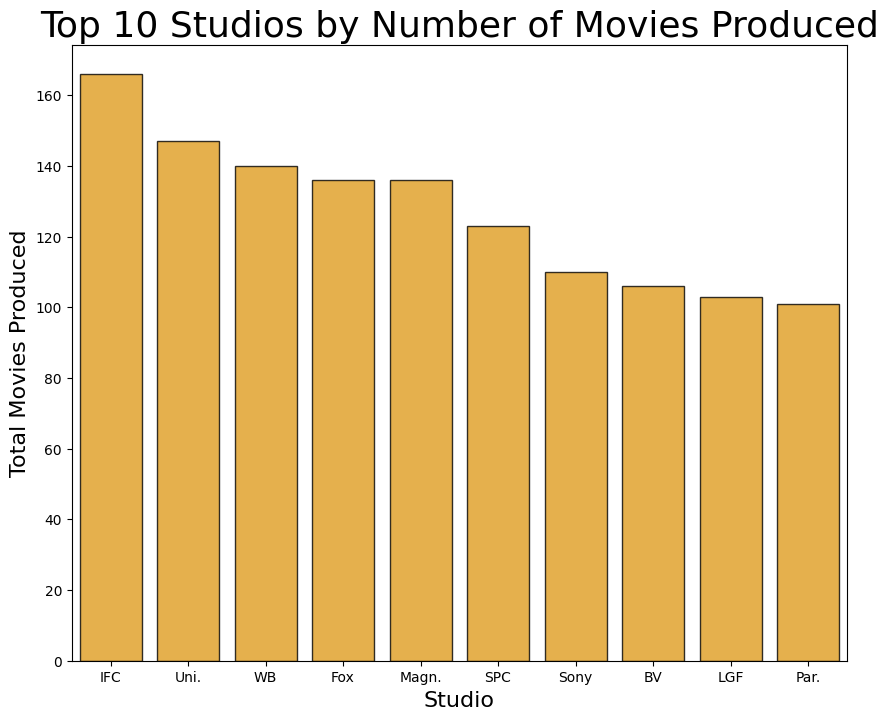

In [378]:
studio_count = studios_df['studio'].value_counts()
studio_count = studio_count[:10]
plt.figure(figsize=(10,8))
sns.barplot(x=studio_count.index, y=studio_count.values, alpha=0.8,color='orange',edgecolor='black')
plt.title('Top 10 Studios by Number of Movies Produced', fontsize=26)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Studio', fontsize=16)
plt.show()

In [379]:
studios_grp = studios_df.groupby(['studio'])

In [380]:
mean_gross = studios_grp['total_gross'].mean()
mean_gross.sort_values(ascending=False, inplace=True)

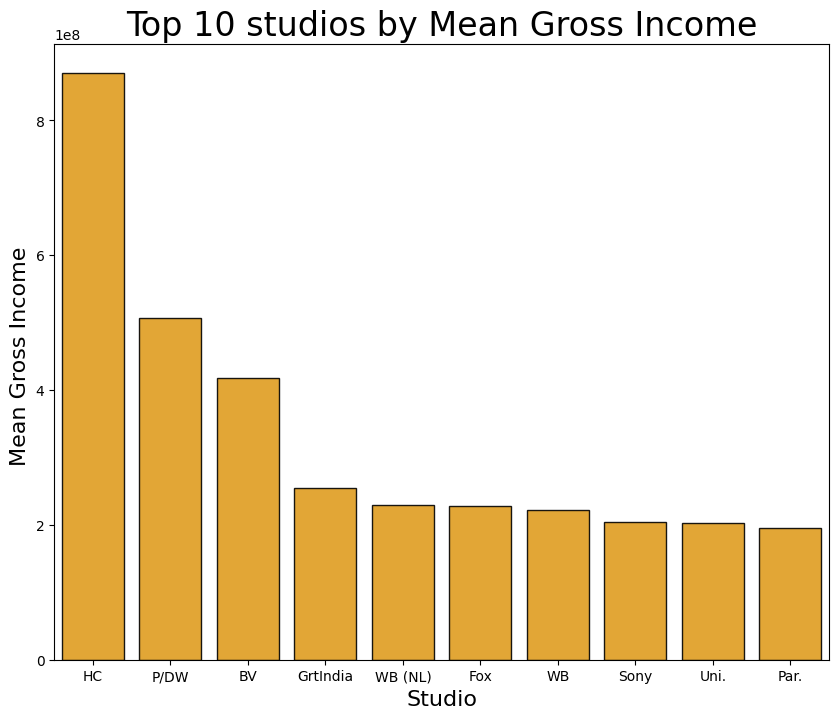

In [382]:
mean_gross = mean_gross[:10,]
plt.figure(figsize=(10,8))
sns.barplot(x=mean_gross.index, y=mean_gross.values, alpha=0.9,color= 'orange',edgecolor='black')
plt.title('Top 10 studios by Mean Gross Income', fontsize=24)
plt.ylabel('Mean Gross Income ', fontsize=16)
plt.xlabel('Studio', fontsize=16)
plt.show()


In [383]:
studios_df.loc[studios_df['studio'].isin(['HC', 'P/DW','GrtIndia'])]

,movie,studio,domestic_gross,foreign_gross,year,total_gross
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08
17,Megamind,P/DW,148400000.0,173500000.0,2010,3.219000e+08
71,Dinner for Schmucks,P/DW,73000000.0,13800000.0,2010,8.680000e+07
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000.0,2011,1.123800e+09
333,Kung Fu Panda 2,P/DW,165200000.0,500400000.0,2011,6.656000e+08
338,Puss in Boots,P/DW,149300000.0,405700000.0,2011,5.550000e+08
734,Madagascar 3: Europe's Most Wanted,P/DW,216400000.0,530500000.0,2012,7.469000e+08
752,Rise of the Guardians,P/DW,103400000.0,203500000.0,2012,3.069000e+08
865,A Thousand Words,P/DW,18500000.0,3600000.0,2012,2.210000e+07


In [384]:
correlation = mean_gross.corr(studio_count)
correlation


np.float64(-0.34479787354052405)

## Inferences
* A slightly negative correlation between number of movies produced and average gross income indicates that a higher number of movies produced does not imply higher revenue.
* Movie industry is mostly centralized in the USA as most of the top 10 studios with most movies produced since 2010 are of American origin.



## Budget and profit analysis
This analysis helped to identify:
* Top 10 most produced Genres
* Average Budget per Genre
* Calculate Profit by Genre
* Calculate Profit Margin by Genre


In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

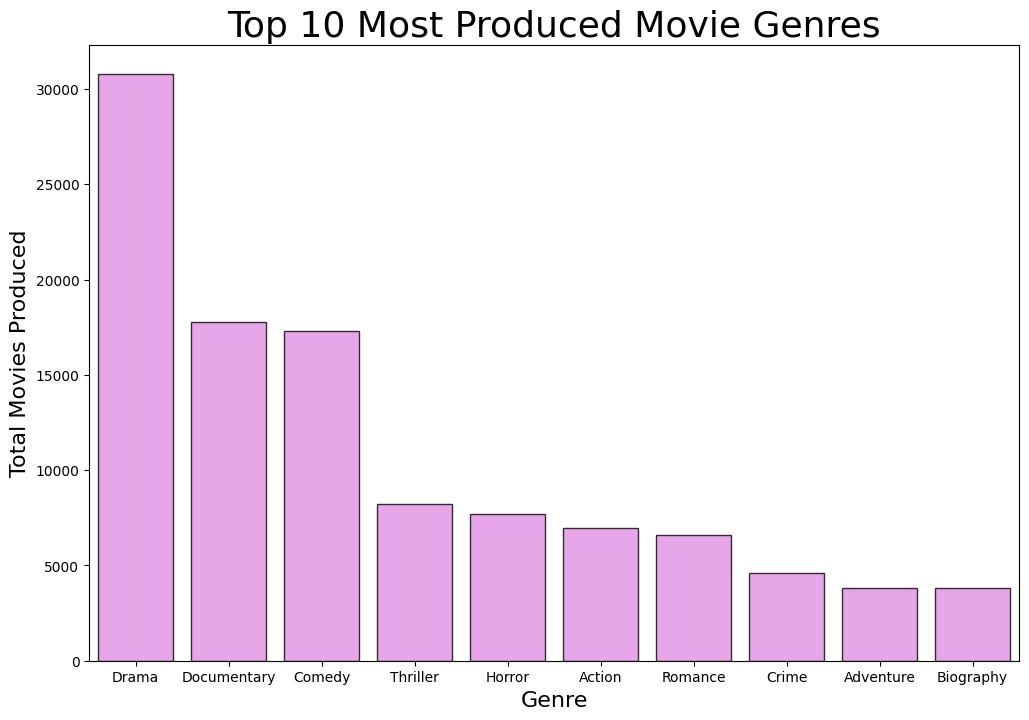

In [386]:
genres_count = genres_df['genres'].value_counts()
genres_count = genres_count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(x=genres_count.index, y=genres_count.values, alpha=0.8,color= 'violet',edgecolor='black')
plt.title('Top 10 Most Produced Movie Genres', fontsize=26)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.show()

In [387]:
genres_df

,genres
movie,
Sunghursh,Action
Sunghursh,Crime
Sunghursh,Drama
One Day Before the Rainy Season,Biography
One Day Before the Rainy Season,Drama
...,...
Diabolik sono io,Documentary
Sokagin Çocuklari,Drama
Sokagin Çocuklari,Family


In [388]:
movie_budgets_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,year
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,Dark Phoenix,350000000,42762350,149762350,2019
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015


In [389]:
movie_budgets_df['profit']= movie_budgets_df['worldwide_gross']- movie_budgets_df['production_budget']

In [390]:
movie_budgets_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,profit
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
2,Dark Phoenix,350000000,42762350,149762350,2019,-200237650
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220


In [391]:
movie_budgets_df['worldwide_gross'].replace(0, 1)

,worldwide_gross
1,1045663875
2,149762350
3,1403013963
4,1316721747
5,2053311220
...,...
5761,1
5771,1
5772,4584
5777,1


In [392]:
movie_budgets_df['profit_margin'] = (movie_budgets_df['profit'].div(movie_budgets_df['worldwide_gross'])*100)


In [393]:
movie_budgets_df = movie_budgets_df[movie_budgets_df['profit_margin'] >= 0]

In [394]:
movie_budgets_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,profit,profit_margin
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,60.733080
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,76.436443
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,75.925058
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,85.097242
6,Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,85.352522


In [395]:
budget_per_genre_df = pd.merge(genres_df, movie_budgets_df, on='movie', how='right')
budget_per_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533 entries, 0 to 3532
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3533 non-null   object 
 1   genres             3331 non-null   object 
 2   production_budget  3533 non-null   int64  
 3   domestic_gross     3533 non-null   int64  
 4   worldwide_gross    3533 non-null   int64  
 5   year               3533 non-null   int64  
 6   profit             3533 non-null   int64  
 7   profit_margin      3533 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 220.9+ KB


In [396]:
budget_per_genre_df.head()

,movie,genres,production_budget,domestic_gross,worldwide_gross,year,profit,profit_margin
0,Pirates of the Caribbean: On Stranger Tides,Action,410600000,241063875,1045663875,2011,635063875,60.733080
1,Pirates of the Caribbean: On Stranger Tides,Adventure,410600000,241063875,1045663875,2011,635063875,60.733080
2,Pirates of the Caribbean: On Stranger Tides,Fantasy,410600000,241063875,1045663875,2011,635063875,60.733080
3,Avengers: Age of Ultron,Action,330600000,459005868,1403013963,2015,1072413963,76.436443
4,Avengers: Age of Ultron,Adventure,330600000,459005868,1403013963,2015,1072413963,76.436443


In [397]:
genre_grp = budget_per_genre_df.groupby(budget_per_genre_df.genres)

In [398]:
mean_budget = genre_grp['production_budget'].mean()
mean_budget.sort_values(ascending=False, inplace=True)

In [399]:
mean_budget.head()

,production_budget
genres,
Adventure,1.123902e+08
Sci-Fi,1.052170e+08
Animation,1.016990e+08
Fantasy,9.067411e+07
Action,8.946778e+07


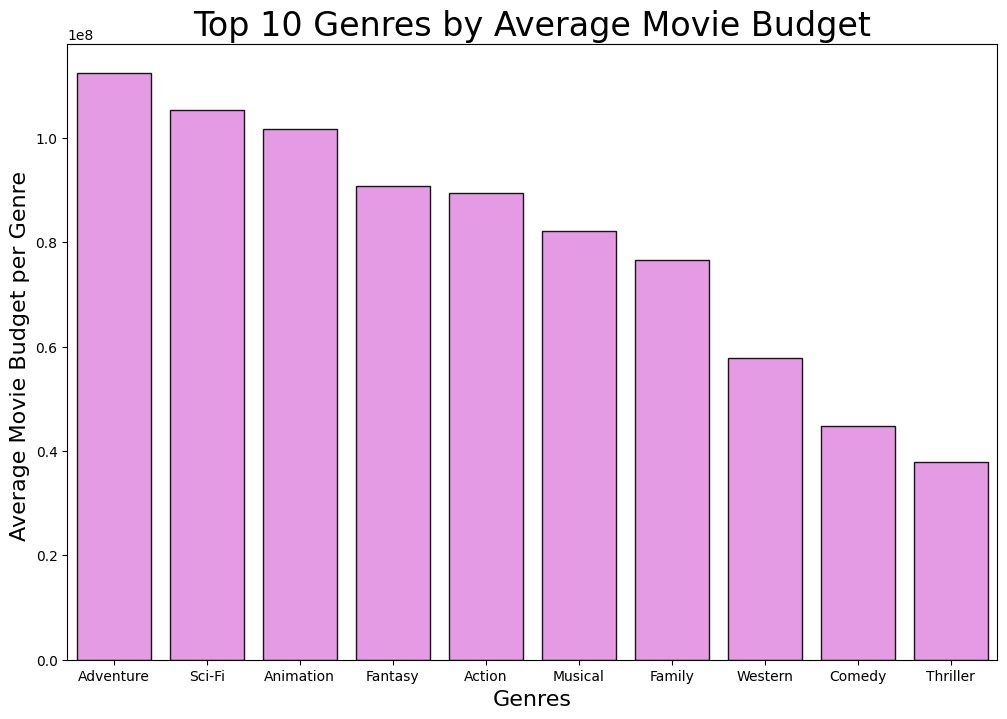

In [403]:
mean_budget = mean_budget[:10,]
plt.figure(figsize=(12,8))
sns.barplot(x=mean_budget.index, y=mean_budget.values, alpha=0.9,color='violet',edgecolor= 'black')
plt.title('Top 10 Genres by Average Movie Budget', fontsize=24)
plt.ylabel('Average Movie Budget per Genre ', fontsize=16)
plt.xlabel('Genres', fontsize=16)
plt.show()

In [404]:
mean_profit = genre_grp['profit'].mean()
mean_profit.sort_values(ascending=False, inplace=True)

In [405]:
mean_profit.head()

,profit
genres,
Musical,3.590613e+08
Sci-Fi,3.042600e+08
Animation,3.032620e+08
Adventure,2.817971e+08
Action,2.100861e+08


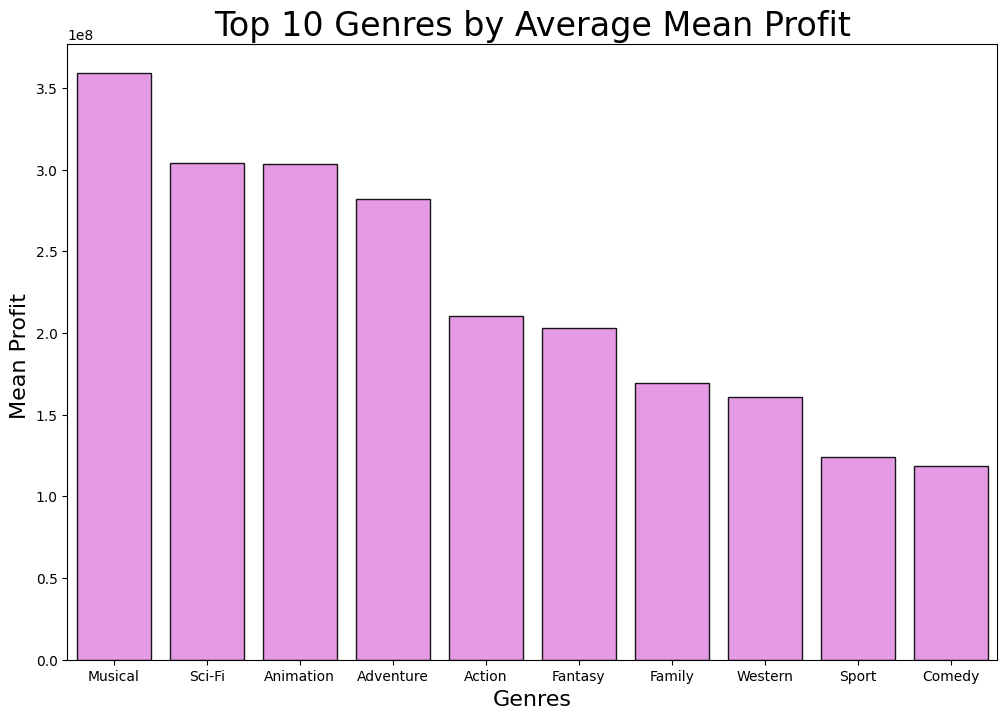

In [406]:
mean_profit = mean_profit[:10,]
plt.figure(figsize=(12,8))
sns.barplot(x=mean_profit.index, y=mean_profit.values, alpha=0.9,color='violet',edgecolor = 'black')
plt.title('Top 10 Genres by Average Mean Profit', fontsize=24)
plt.ylabel('Mean Profit ', fontsize=16)
plt.xlabel('Genres', fontsize=16)
plt.show()

In [407]:
correlation1 = mean_profit.corr(mean_budget)
correlation1

np.float64(0.7292965816142425)

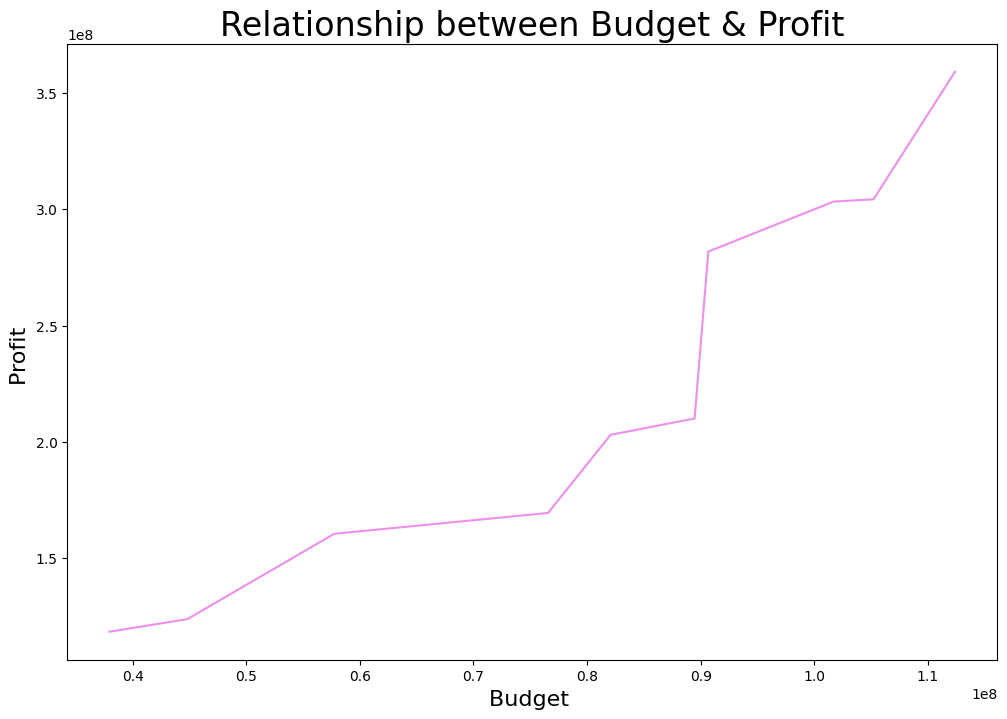

In [409]:
plt.figure(figsize=(12,8))
sns.lineplot(x=mean_budget.values, y=mean_profit.values, alpha=0.9,color='violet')
plt.title('Relationship between Budget & Profit', fontsize=24)
plt.ylabel('Profit ', fontsize=16)
plt.xlabel('Budget ', fontsize=16)
plt.show()

In [410]:
mean_profit_margin = genre_grp['profit_margin'].mean().round(decimals=2)
mean_profit_margin.sort_values(ascending=False, inplace=True)
mean_profit_margin = mean_profit_margin[:12,]
%store mean_profit_margin

Stored 'mean_profit_margin' (Series)


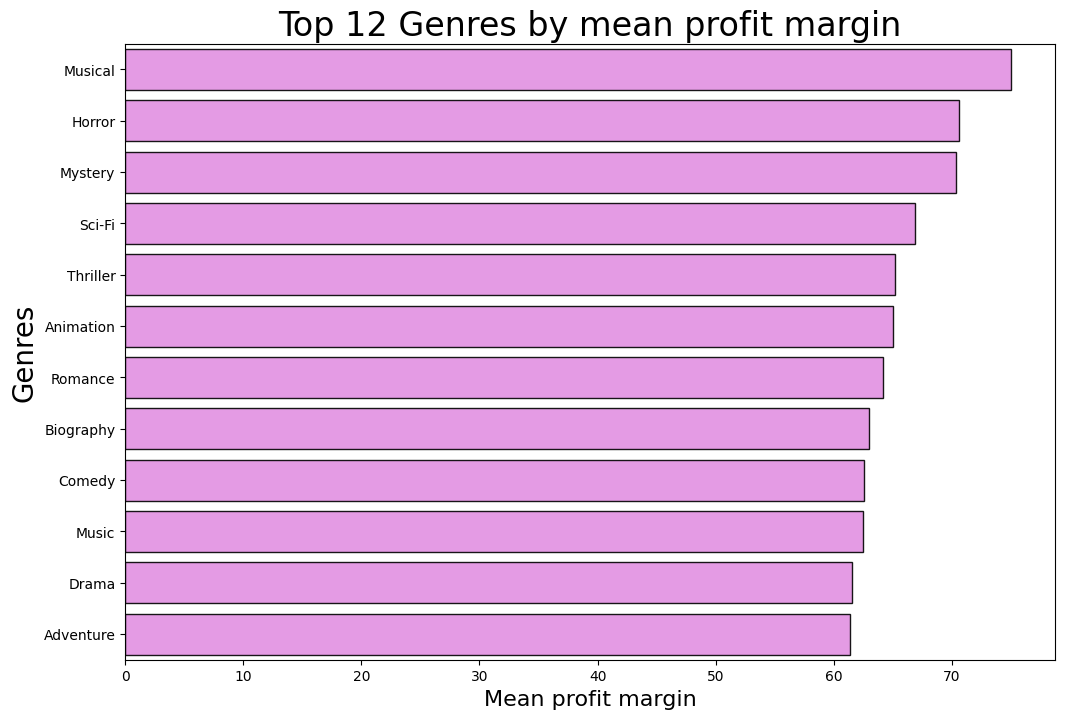

In [411]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_profit_margin.values, y=mean_profit_margin.index, alpha=0.9,color='violet',edgecolor='black')
plt.title('Top 12 Genres by mean profit margin', fontsize=24)
plt.ylabel('Genres', fontsize=20)
plt.xlabel('Mean profit margin', fontsize=16)
plt.show()

In [412]:
correlation2 = mean_budget.corr(mean_profit_margin)
correlation2

np.float64(0.029331000411372318)

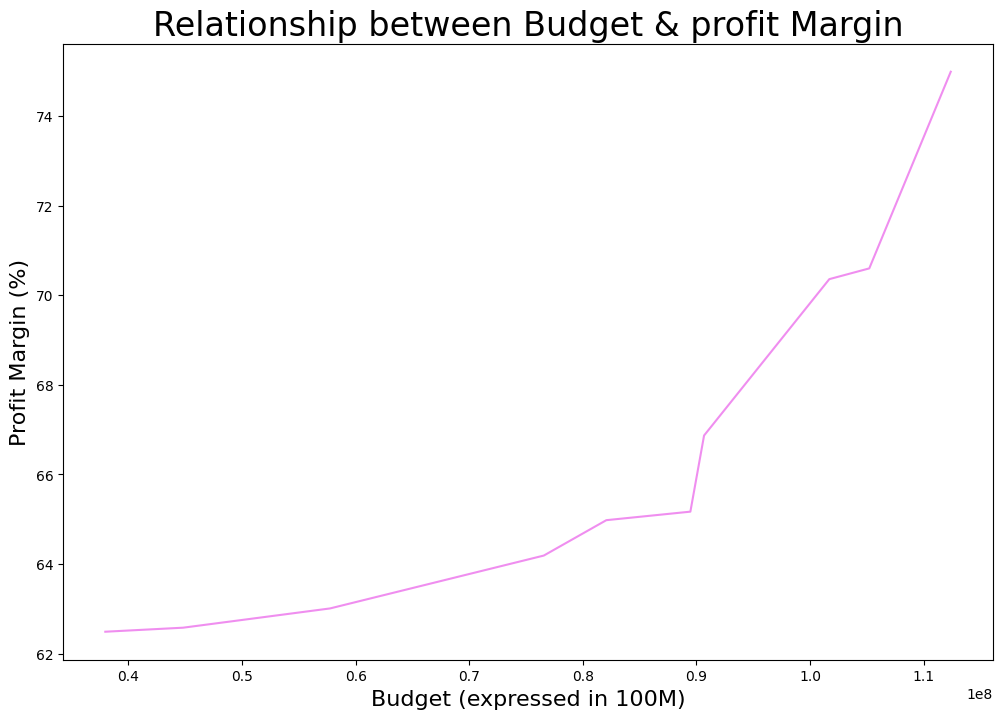

In [413]:
mean_profit_margin = mean_profit_margin[:10,]
plt.figure(figsize=(12,8))
sns.lineplot(x=mean_budget.values, y=mean_profit_margin.values, alpha=0.9,color='violet')
plt.title('Relationship between Budget & profit Margin', fontsize=24)
plt.ylabel('Profit Margin (%)', fontsize=16)
plt.xlabel('Budget (expressed in 100M)', fontsize=16)
plt.show()

## Inferences
- Audiences crave stories — and the industry delivers. Drama, Documentary, and Comedy are the storytelling engines of modern cinema.
- Spend smart, earn big: our data shows that investing more in the right genre pays off.
- Comedy, Adventure, and Sci-Fi? They’re the triple-threat genres that entertain, engage, and consistently perform.


## Ratings analysis
This analysis highlights the top 10 Best Rated Genres.

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [415]:
ratings_by_genre = pd.merge(basics_and_ratings_df, genres_df, on='movie', how='inner')

In [416]:
genre_grp = ratings_by_genre.groupby(ratings_by_genre.genres_y)

In [417]:
mean_rating = genre_grp['averagerating'].mean()
mean_rating.sort_values(ascending=False, inplace=True)

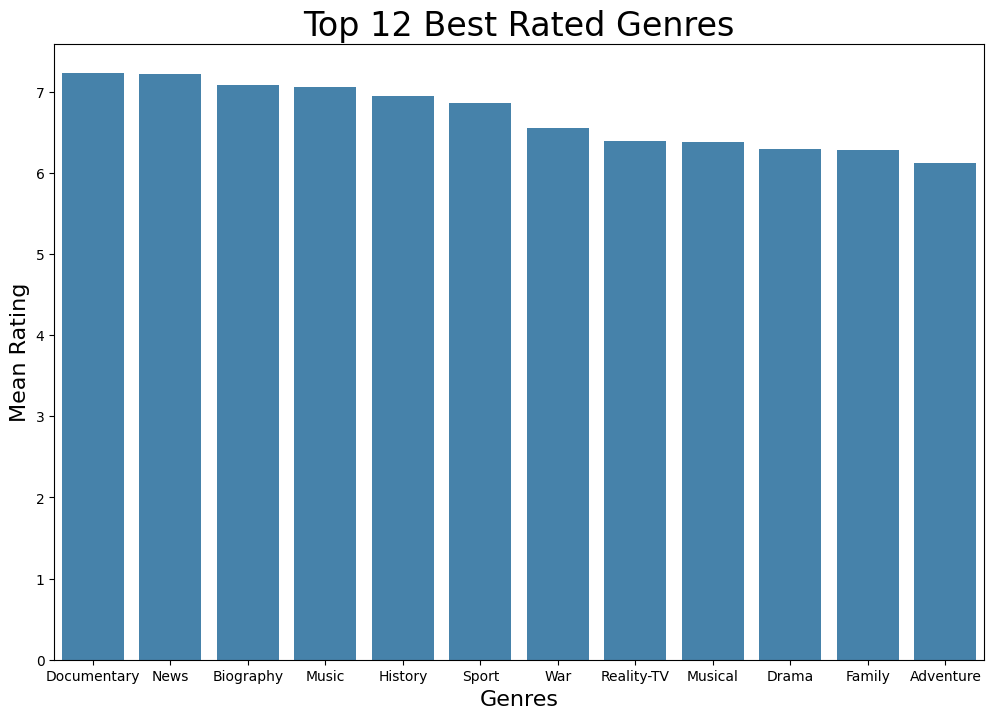

In [418]:
mean_rating = mean_rating[:12,]
plt.figure(figsize=(12,8))
sns.barplot(x=mean_rating.index, y=mean_rating.values, alpha=0.9)
plt.title('Top 12 Best Rated Genres', fontsize=24)
plt.ylabel('Mean Rating', fontsize=16)
plt.xlabel('Genres', fontsize=16)
plt.show()

In [419]:
correlation3 = mean_rating.corr(mean_profit_margin)
correlation3

np.float64(-0.9979847930864609)

## Inferences
* A slightly negative correlation between Ratings and Profit Margin reveal that best rated does not always mean most profitable.
* Music, Musical, Drama, Biography and Adventure are well rated and also highly profitable.

## Conclusion

* A higher number of movies produced does not imply higher revenue.
* Music, Musical, Drama, Biography and Adventure are well rated and also highly profitable.
* Drama, Documentary, and Comedy are the storytelling engines of modern cinema.
* investing more in the right genre pays off.
* Movie industry is mostly centralized in the USA as most of the top 10 studios with most movies produced since 2010 are of American origin.
* Drama is our Top 1 most produced and we also see it in the top 12 best rated and it’s also listed in the top 12 with the highest return percentage.
* A good budget for each movie produced should be between 4$ and 10$
